**AI&DA18 Batch 1 Lab Exam Name: Atharva M. Kulkarni GR No: 11810384**

Q9: Design and Implement different ANN models to predict the median house value using the
following dataset. (Use median_house_price column as a y label)
Dataset Link: https://drive.google.com/file/d/1_yg6u5zqusErB3DSRXfW18IST2ButJXp/view?usp=sharing

A. Create different models for following optimizers
1. momentum
2. rmsprop
3. adagrad
4. adam

B. Split data using 80:20 split and random_state=26

C. Train every model using above data and store their epochs wise loss (use min 10 epochs)

D. Plot the loss against number_of_epochs for every optimizer and conclude which optimizer converges faster.

In [12]:
import pandas as pd
import numpy as np
import re
import os
from google.colab import drive
drive.mount('/content/drive')
from sklearn.preprocessing import MinMaxScaler
from sklearn import model_selection
from keras.callbacks import ModelCheckpoint
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten, Dropout
import tensorflow as tf
import matplotlib.pyplot as plt
import pickle

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [13]:
df = pd.read_csv('/content/drive/My Drive/Q2_housing_data.csv')

In [ ]:
display(df)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


**Data Preprocessing**

a. Dealing with NaNs

b. Dealing with Categorical Data

c. Train-Test Split

d. Data Scaling

In [ ]:
print(df.columns)
print(df.isnull().sum())

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')
longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64


In [ ]:
df['total_bedrooms'].fillna(df['total_bedrooms'].median(), inplace=True)
print(df.isnull().sum())

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64


In [ ]:
ocean_proximity_set = set(df['ocean_proximity'])
print(ocean_proximity_set)

proximity_types = {"ISLAND": 0, "<1H OCEAN": 1, "NEAR BAY": 2, "INLAND": 3, "NEAR OCEAN": 4}
df['ocean_proximity'] = df['ocean_proximity'].map(proximity_types)
display(df)

{'NEAR BAY', 'NEAR OCEAN', '<1H OCEAN', 'ISLAND', 'INLAND'}


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,2
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,2
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,2
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,2
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,2
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,3
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,3
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,3
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,3


In [ ]:
scaler = MinMaxScaler()
df[["longitude", "latitude", "housing_median_age", "total_rooms", "total_bedrooms", "population", "households", "median_house_value", "ocean_proximity"]] = scaler.fit_transform(df[["longitude", "latitude", "housing_median_age", "total_rooms", "total_bedrooms", "population", "households", "median_house_value", "ocean_proximity"]])
display(df)
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,0.211155,0.567481,0.784314,0.022331,0.019863,0.008941,0.020556,8.3252,0.902266,0.50
1,0.212151,0.565356,0.392157,0.180503,0.171477,0.067210,0.186976,8.3014,0.708247,0.50
2,0.210159,0.564293,1.000000,0.037260,0.029330,0.013818,0.028943,7.2574,0.695051,0.50
3,0.209163,0.564293,1.000000,0.032352,0.036313,0.015555,0.035849,5.6431,0.672783,0.50
4,0.209163,0.564293,1.000000,0.041330,0.043296,0.015752,0.042427,3.8462,0.674638,0.50
...,...,...,...,...,...,...,...,...,...,...
20635,0.324701,0.737513,0.470588,0.042296,0.057883,0.023599,0.054103,1.5603,0.130105,0.75
20636,0.312749,0.738576,0.333333,0.017676,0.023122,0.009894,0.018582,2.5568,0.128043,0.75
20637,0.311753,0.732200,0.313725,0.057277,0.075109,0.028140,0.071041,1.7000,0.159383,0.75
20638,0.301793,0.732200,0.333333,0.047256,0.063315,0.020684,0.057227,1.8672,0.143713,0.75


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,0.476125,0.328572,0.541951,0.066986,0.083153,0.039869,0.081983,3.870671,0.395579,0.532958
std,0.199555,0.226988,0.246776,0.055486,0.065083,0.031740,0.062873,1.899822,0.237928,0.280490
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.499900,0.000000,0.000000
25%,0.253984,0.147715,0.333333,0.036771,0.045934,0.021974,0.045881,2.563400,0.215671,0.250000
50%,0.583665,0.182784,0.549020,0.054046,0.067349,0.032596,0.067094,3.534800,0.339588,0.500000
75%,0.631474,0.549416,0.705882,0.080014,0.099666,0.048264,0.099326,4.743250,0.514897,0.750000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,15.000100,1.000000,1.000000


In [14]:
#X = df.drop(['median_house_value'], 1)
#y = df['median_house_value']
#X = np.array(X)
#y = np.array(y)

#X_train, X_test, y_train, y_test =  model_selection.train_test_split(X, y, test_size = 0.2, random_state = 26, shuffle = True)
#with open('/content/drive/MyDrive/Lab VP/housing_price_train_test.pkl', 'wb') as f:
#  pickle.dump((X_train, X_test, y_train, y_test), f)

with open('/content/drive/MyDrive/Lab VP/housing_price_train_test.pkl', 'rb') as f:
  X_train, X_test, y_train, y_test = pickle.load(f)

**SGD Optimizer with Momentum = 0.2**

In [15]:
model_SGD = Sequential()
model_SGD.add(Dense(32, kernel_initializer='uniform', input_dim = X_train.shape[1], activation='relu'))
model_SGD.add(Dropout(0.1))
model_SGD.add(Dense(64, kernel_initializer='uniform',activation='relu'))
model_SGD.add(Dropout(0.1))
model_SGD.add(Dense(32, kernel_initializer='uniform',activation='relu'))
model_SGD.add(Dropout(0.2))
model_SGD.add(Dense(1, kernel_initializer='uniform',activation='linear'))

tf.keras.optimizers.SGD(learning_rate=0.001, momentum=0.2, name="SGD")
model_SGD.compile(loss = tf.keras.losses.MeanSquaredError(), optimizer = 'SGD', metrics = ['mean_squared_error'])
model_SGD.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 32)                320       
_________________________________________________________________
dropout_3 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 64)                2112      
_________________________________________________________________
dropout_4 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 32)                2080      
_________________________________________________________________
dropout_5 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 1)                

In [ ]:
model_history_SGD = model_SGD.fit(X_train, y_train, epochs = 30, batch_size = 8, validation_split = 0.1)

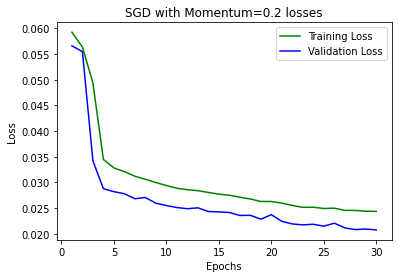

In [17]:
train_loss_SGD = model_history_SGD.history['loss']
val_loss_SGD = model_history_SGD.history['val_loss']
epoch_range = range(1, 31)
plt.plot(epoch_range, train_loss_SGD, 'g', label = "Training Loss")
plt.plot(epoch_range, val_loss_SGD, 'b', label = "Validation Loss")
plt.title('SGD with Momentum=0.2 losses')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

**RMSProp Optimizer**

In [18]:
model_rmsprop = Sequential()
model_rmsprop.add(Dense(32, kernel_initializer='uniform', input_dim = X_train.shape[1], activation='relu'))
model_rmsprop.add(Dropout(0.1))
model_rmsprop.add(Dense(64, kernel_initializer='uniform',activation='relu'))
model_rmsprop.add(Dropout(0.1))
model_rmsprop.add(Dense(32, kernel_initializer='uniform',activation='relu'))
model_rmsprop.add(Dropout(0.2))
model_rmsprop.add(Dense(1, kernel_initializer='uniform',activation='linear'))

tf.keras.optimizers.RMSprop(learning_rate=0.001, momentum=0.0, name="RMSprop")
model_rmsprop.compile(loss = tf.keras.losses.MeanSquaredError(), optimizer = 'RMSprop', metrics = ['mean_squared_error'])
model_rmsprop.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 32)                320       
_________________________________________________________________
dropout_6 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_9 (Dense)              (None, 64)                2112      
_________________________________________________________________
dropout_7 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_10 (Dense)             (None, 32)                2080      
_________________________________________________________________
dropout_8 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_11 (Dense)             (None, 1)                

In [ ]:
model_history_rmsprop = model_rmsprop.fit(X_train, y_train, epochs = 30, batch_size = 8, validation_split = 0.1)

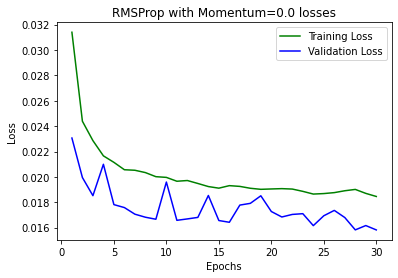

In [20]:
train_loss_rmsprop = model_history_rmsprop.history['loss']
val_loss_rmsprop = model_history_rmsprop.history['val_loss']
epoch_range = range(1, 31)
plt.plot(epoch_range, train_loss_rmsprop, 'g', label = "Training Loss")
plt.plot(epoch_range, val_loss_rmsprop, 'b', label = "Validation Loss")
plt.title('RMSProp with Momentum=0.0 losses')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

**AdaGrad Optimizer**

In [21]:
model_adagrad = Sequential()
model_adagrad.add(Dense(32, kernel_initializer='uniform', input_dim = X_train.shape[1], activation='relu'))
model_adagrad.add(Dropout(0.1))
model_adagrad.add(Dense(64, kernel_initializer='uniform',activation='relu'))
model_adagrad.add(Dropout(0.1))
model_adagrad.add(Dense(32, kernel_initializer='uniform',activation='relu'))
model_adagrad.add(Dropout(0.2))
model_adagrad.add(Dense(1, kernel_initializer='uniform',activation='linear'))

tf.keras.optimizers.Adagrad(learning_rate=0.001, name="Adagrad")
model_adagrad.compile(loss = tf.keras.losses.MeanSquaredError(), optimizer = 'Adagrad', metrics = ['mean_squared_error'])
model_adagrad.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 32)                320       
_________________________________________________________________
dropout_9 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_13 (Dense)             (None, 64)                2112      
_________________________________________________________________
dropout_10 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_14 (Dense)             (None, 32)                2080      
_________________________________________________________________
dropout_11 (Dropout)         (None, 32)                0         
_________________________________________________________________
dense_15 (Dense)             (None, 1)                

In [ ]:
model_history_adagrad = model_adagrad.fit(X_train, y_train, epochs = 30, batch_size = 8, validation_split = 0.1)

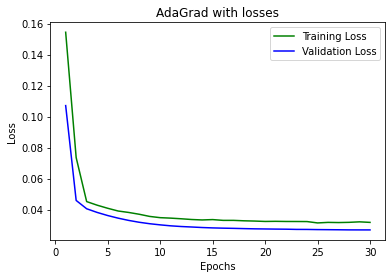

In [23]:
train_loss_adagrad = model_history_adagrad.history['loss']
val_loss_adagrad = model_history_adagrad.history['val_loss']
epoch_range = range(1, 31)
plt.plot(epoch_range, train_loss_adagrad, 'g', label = "Training Loss")
plt.plot(epoch_range, val_loss_adagrad, 'b', label = "Validation Loss")
plt.title('AdaGrad with losses')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

**Adam Optimizer**

In [24]:
model_adam = Sequential()
model_adam.add(Dense(32, kernel_initializer='uniform', input_dim = X_train.shape[1], activation='relu'))
model_adam.add(Dropout(0.1))
model_adam.add(Dense(64, kernel_initializer='uniform',activation='relu'))
model_adam.add(Dropout(0.1))
model_adam.add(Dense(32, kernel_initializer='uniform',activation='relu'))
model_adam.add(Dropout(0.2))
model_adam.add(Dense(1, kernel_initializer='uniform',activation='linear'))

tf.keras.optimizers.Adam(learning_rate=0.001, name="Adam")
model_adam.compile(loss = tf.keras.losses.MeanSquaredError(), optimizer = 'Adam', metrics = ['mean_squared_error'])
model_adam.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 32)                320       
_________________________________________________________________
dropout_12 (Dropout)         (None, 32)                0         
_________________________________________________________________
dense_17 (Dense)             (None, 64)                2112      
_________________________________________________________________
dropout_13 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_18 (Dense)             (None, 32)                2080      
_________________________________________________________________
dropout_14 (Dropout)         (None, 32)                0         
_________________________________________________________________
dense_19 (Dense)             (None, 1)                

In [ ]:
model_history_adam = model_adam.fit(X_train, y_train, epochs = 30, batch_size = 8, validation_split = 0.1)

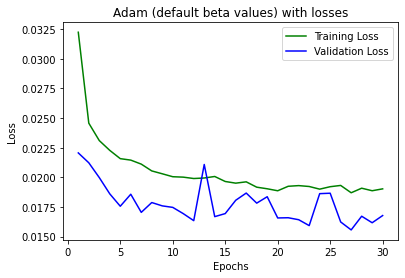

In [26]:
train_loss_adam = model_history_adam.history['loss']
val_loss_adam = model_history_adam.history['val_loss']
epoch_range = range(1, 31)
plt.plot(epoch_range, train_loss_adam, 'g', label = "Training Loss")
plt.plot(epoch_range, val_loss_adam, 'b', label = "Validation Loss")
plt.title('Adam (default beta values) with losses')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

**Comparing the Different Optimizers**

During the said activity, we've applied the following Optimizers to our ANN model:

a) SGD with momentum=0.2

b) RMSProp

c) AdaGrad

d) Adam

On comparing the results, we can comment that for this particular problem statement, Adam and RMSProp show similar behavior and converge the quickest. AdaGrad starts with a high arbitrary state and as a result takes some more time to converge while SGD converges the slowest owing to it's relatively primitive nature.


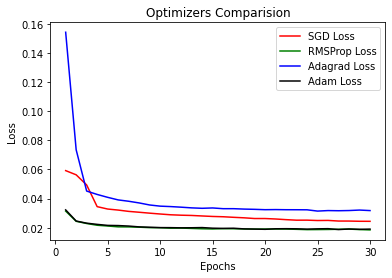

In [27]:
plt.plot(epoch_range, train_loss_SGD, 'r', label = "SGD Loss")
plt.plot(epoch_range, train_loss_rmsprop, 'g', label = "RMSProp Loss")
plt.plot(epoch_range, train_loss_adagrad, 'b', label = "Adagrad Loss")
plt.plot(epoch_range, train_loss_adam, 'k', label = "Adam Loss")
plt.title('Optimizers Comparision')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()